In [2]:
import os
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

2025-01-23 12:15:23.224790: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 12:15:23.403670: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 12:15:23.549963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737648923.707101   10309 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737648923.743384   10309 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-23 12:15:24.064081: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
len(y_train)

60000

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [8]:
len(y_test)

10000

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

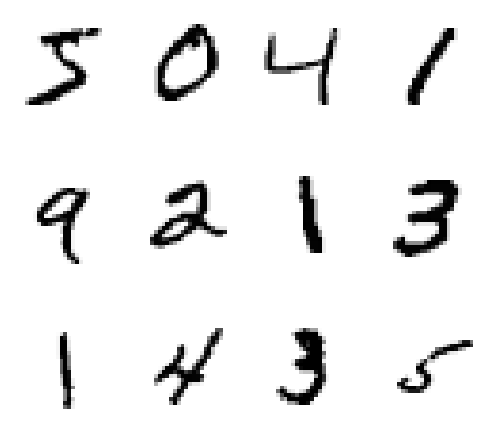

In [10]:
plt.figure(figsize = (5,5))
for k in range(12):
    plt.subplot(3, 4, k + 1)
    plt.imshow(X_train[k], cmap = 'Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
X_train = X_train.reshape(60000, 28 * 28).astype('float32')
X_test = X_test.reshape(10000, 28 * 28).astype('float32')

In [12]:
X_train /= 255
X_test /= 255

In [13]:
n_classes = 10
model = Sequential()
model.add(Dense(512, activation='relu', input_dim = 28 * 28))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

/home/caio/anaconda3/envs/ds/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-23 12:15:30.297569: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, y_train,
                    epochs = 5,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/5


2025-01-23 12:15:30.736781: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8488 - loss: 0.5260

2025-01-23 12:15:40.843204: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8492 - loss: 0.5248 - val_accuracy: 0.9520 - val_loss: 0.1607
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9616 - loss: 0.1317 - val_accuracy: 0.9664 - val_loss: 0.1105
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9779 - loss: 0.0784 - val_accuracy: 0.9735 - val_loss: 0.0908
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9842 - loss: 0.0549 - val_accuracy: 0.9760 - val_loss: 0.0806
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9890 - loss: 0.0395 - val_accuracy: 0.9788 - val_loss: 0.0764


In [16]:
history.history

{'accuracy': [0.9144583344459534,
  0.9646875262260437,
  0.9773541688919067,
  0.9838541746139526,
  0.9876041412353516],
 'loss': [0.2991388738155365,
  0.12237583100795746,
  0.07960151880979538,
  0.055312883108854294,
  0.04145176336169243],
 'val_accuracy': [0.9520000219345093,
  0.9664166569709778,
  0.9735000133514404,
  0.9760000109672546,
  0.9788333177566528],
 'val_loss': [0.16073091328144073,
  0.11046405881643295,
  0.09081728011369705,
  0.0805642157793045,
  0.07636687159538269]}

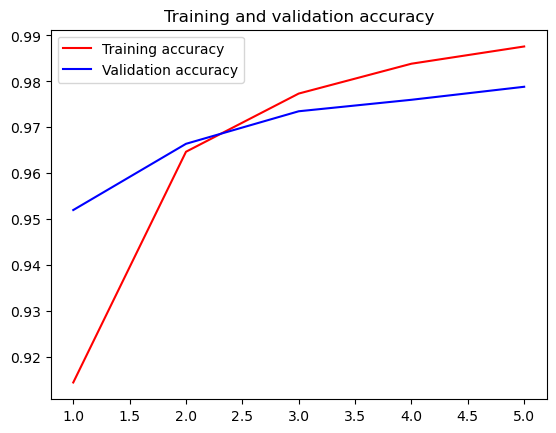

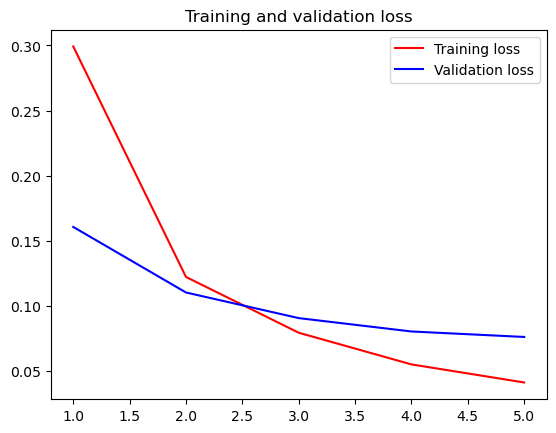

In [17]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label = "Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [18]:
predictions = model.predict(X_test)

 40/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

2025-01-23 12:16:14.751941: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
predictions[0]

array([1.2007739e-07, 1.9243682e-08, 1.4497380e-05, 1.0542960e-04,
       6.5158816e-11, 1.2678734e-07, 7.6336784e-11, 9.9987578e-01,
       2.1055466e-06, 1.9193610e-06], dtype=float32)

In [20]:
predictions[0].argmax()

7

In [21]:
y_test[0]

7

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)

 14/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9952 - loss: 0.0347

2025-01-23 12:16:16.024907: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9745 - loss: 0.0822


In [23]:
test_acc, test_loss

(0.9779000282287598, 0.06945738941431046)

In [24]:
print(f"test_acc: {test_acc}")

test_acc: 0.9779000282287598
